In [1]:
#!pip install kagglehub --upgrade

In [2]:
import kagglehub

path = kagglehub.dataset_download("undefinenull/million-song-dataset-spotify-lastfm")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ljm47\.cache\kagglehub\datasets\undefinenull\million-song-dataset-spotify-lastfm\versions\1


In [3]:
import os
from pathlib import Path
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data_path = Path("C:/Users/ljm47/.cache/kagglehub/datasets/undefinenull/million-song-dataset-spotify-lastfm/versions/1")

song_data_path = data_path/ 'Music info.csv'
user_data_path = data_path/ 'User Listening History.csv'


In [57]:
#load songs data
df_songs = pd.read_csv(song_data_path)
df_songs.head(3)

track_id             name       artist  \
0  TRIOREW128F424EAF0   Mr. Brightside  The Killers   
1  TRRIVDJ128F429B0E8       Wonderwall        Oasis   
2  TROUVHL128F426C441  Come as You Are      Nirvana   

                                 spotify_preview_url              spotify_id  \
0  https://p.scdn.co/mp3-preview/4d26180e6961fd46...  09ZQ5TmUG8TSL56n0knqrj   
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   
2  https://p.scdn.co/mp3-preview/a1c11bb1cb231031...  0keNu0t0tqsWtExGM3nT1D   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   
2   rock, alternative, alternative_rock, 90s, grunge   RnB  1991       218920   

   danceability  ...  key  loudness  mode  speechiness  acousticness  \
0         0.355  ...    1    -4.360     1       0.0746      0.001190   
1         0.409  ...    2    -4.373     1       0.0336      0.000807   
2         0.508  ...    4    -5.783     0       0.0400      0.000175   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.0971    0.240  148.114               4  
1          0.000000    0.2070    0.651  174.426               4  
2          0.000459    0.0878    0.543  120.012               4  

[3 rows x 21 columns]

In [63]:
df_songs.iloc[1].index[0]

'track_id'

In [72]:
song_row = df_songs[df_songs['name']== 'Wonderwall']
print(song_row)
print("---------------------------------")
song_index = song_row.index[0]
print(song_index)
print('------------------------')
input_vector = df_songs.iloc[song_index]
print(input_vector)
print('-------------------')
track_id = song_row['track_id'].values.item()
print(track_id)

             track_id        name artist  \
1  TRRIVDJ128F429B0E8  Wonderwall  Oasis   

                                 spotify_preview_url              spotify_id  \
1  https://p.scdn.co/mp3-preview/d012e536916c927b...  06UfBBDISthj1ZJAtX4xjj   

                                                tags genre  year  duration_ms  \
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   

   danceability  ...  key  loudness  mode  speechiness  acousticness  \
1         0.409  ...    2    -4.373     1       0.0336      0.000807   

   instrumentalness  liveness  valence    tempo  time_signature  
1               0.0     0.207    0.651  174.426               4  

[1 rows x 21 columns]
---------------------------------
1
------------------------
track_id                                              TRRIVDJ128F429B0E8
name                                                          Wonderwall
artist                                                             Oasis
spotify

In [7]:
df_songs['name'].nunique()

50683

# Preiliminary Analysis

In [8]:
df_songs.shape

(50683, 21)

In [9]:
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50683 entries, 0 to 50682
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   track_id             50683 non-null  object 
 1   name                 50683 non-null  object 
 2   artist               50683 non-null  object 
 3   spotify_preview_url  50683 non-null  object 
 4   spotify_id           50683 non-null  object 
 5   tags                 49556 non-null  object 
 6   genre                22348 non-null  object 
 7   year                 50683 non-null  int64  
 8   duration_ms          50683 non-null  int64  
 9   danceability         50683 non-null  float64
 10  energy               50683 non-null  float64
 11  key                  50683 non-null  int64  
 12  loudness             50683 non-null  float64
 13  mode                 50683 non-null  int64  
 14  speechiness          50683 non-null  float64
 15  acousticness         50683 non-null 

In [10]:
df_songs[['tags', 'genre']]

tags       genre
0      rock, alternative, indie, alternative_rock, in...         NaN
1      rock, alternative, indie, pop, alternative_roc...         NaN
2       rock, alternative, alternative_rock, 90s, grunge         RnB
3      rock, alternative, indie, alternative_rock, in...         NaN
4      rock, alternative, indie, alternative_rock, in...         RnB
...                                                  ...         ...
50678                                                NaN         NaN
50679            rock, alternative_rock, japanese, cover         NaN
50680                    metal, metalcore, post_hardcore         NaN
50681                                                NaN         NaN
50682                                     rock, japanese  Electronic

[50683 rows x 2 columns]

In [11]:
#drop columns from data 
columns_to_drop= ["spotify_preview_url"]
df_songs.drop(columns=columns_to_drop, inplace=True)
df_songs.head(3)

track_id             name       artist              spotify_id  \
0  TRIOREW128F424EAF0   Mr. Brightside  The Killers  09ZQ5TmUG8TSL56n0knqrj   
1  TRRIVDJ128F429B0E8       Wonderwall        Oasis  06UfBBDISthj1ZJAtX4xjj   
2  TROUVHL128F426C441  Come as You Are      Nirvana  0keNu0t0tqsWtExGM3nT1D   

                                                tags genre  year  duration_ms  \
0  rock, alternative, indie, alternative_rock, in...   NaN  2004       222200   
1  rock, alternative, indie, pop, alternative_roc...   NaN  2006       258613   
2   rock, alternative, alternative_rock, 90s, grunge   RnB  1991       218920   

   danceability  energy  key  loudness  mode  speechiness  acousticness  \
0         0.355   0.918    1    -4.360     1       0.0746      0.001190   
1         0.409   0.892    2    -4.373     1       0.0336      0.000807   
2         0.508   0.826    4    -5.783     0       0.0400      0.000175   

   instrumentalness  liveness  valence    tempo  time_signature  
0          0.000000    0.0971    0.240  148.114               4  
1          0.000000    0.2070    0.651  174.426               4  
2          0.000459    0.0878    0.543  120.012               4

In [12]:
#missing values
df_songs.isna().sum()

# more than 50% data is missing in genre.

track_id                0
name                    0
artist                  0
spotify_id              0
tags                 1127
genre               28335
year                    0
duration_ms             0
danceability            0
energy                  0
key                     0
loudness                0
mode                    0
speechiness             0
acousticness            0
instrumentalness        0
liveness                0
valence                 0
tempo                   0
time_signature          0
dtype: int64

In [13]:
#pip install missingno

<Axes: >

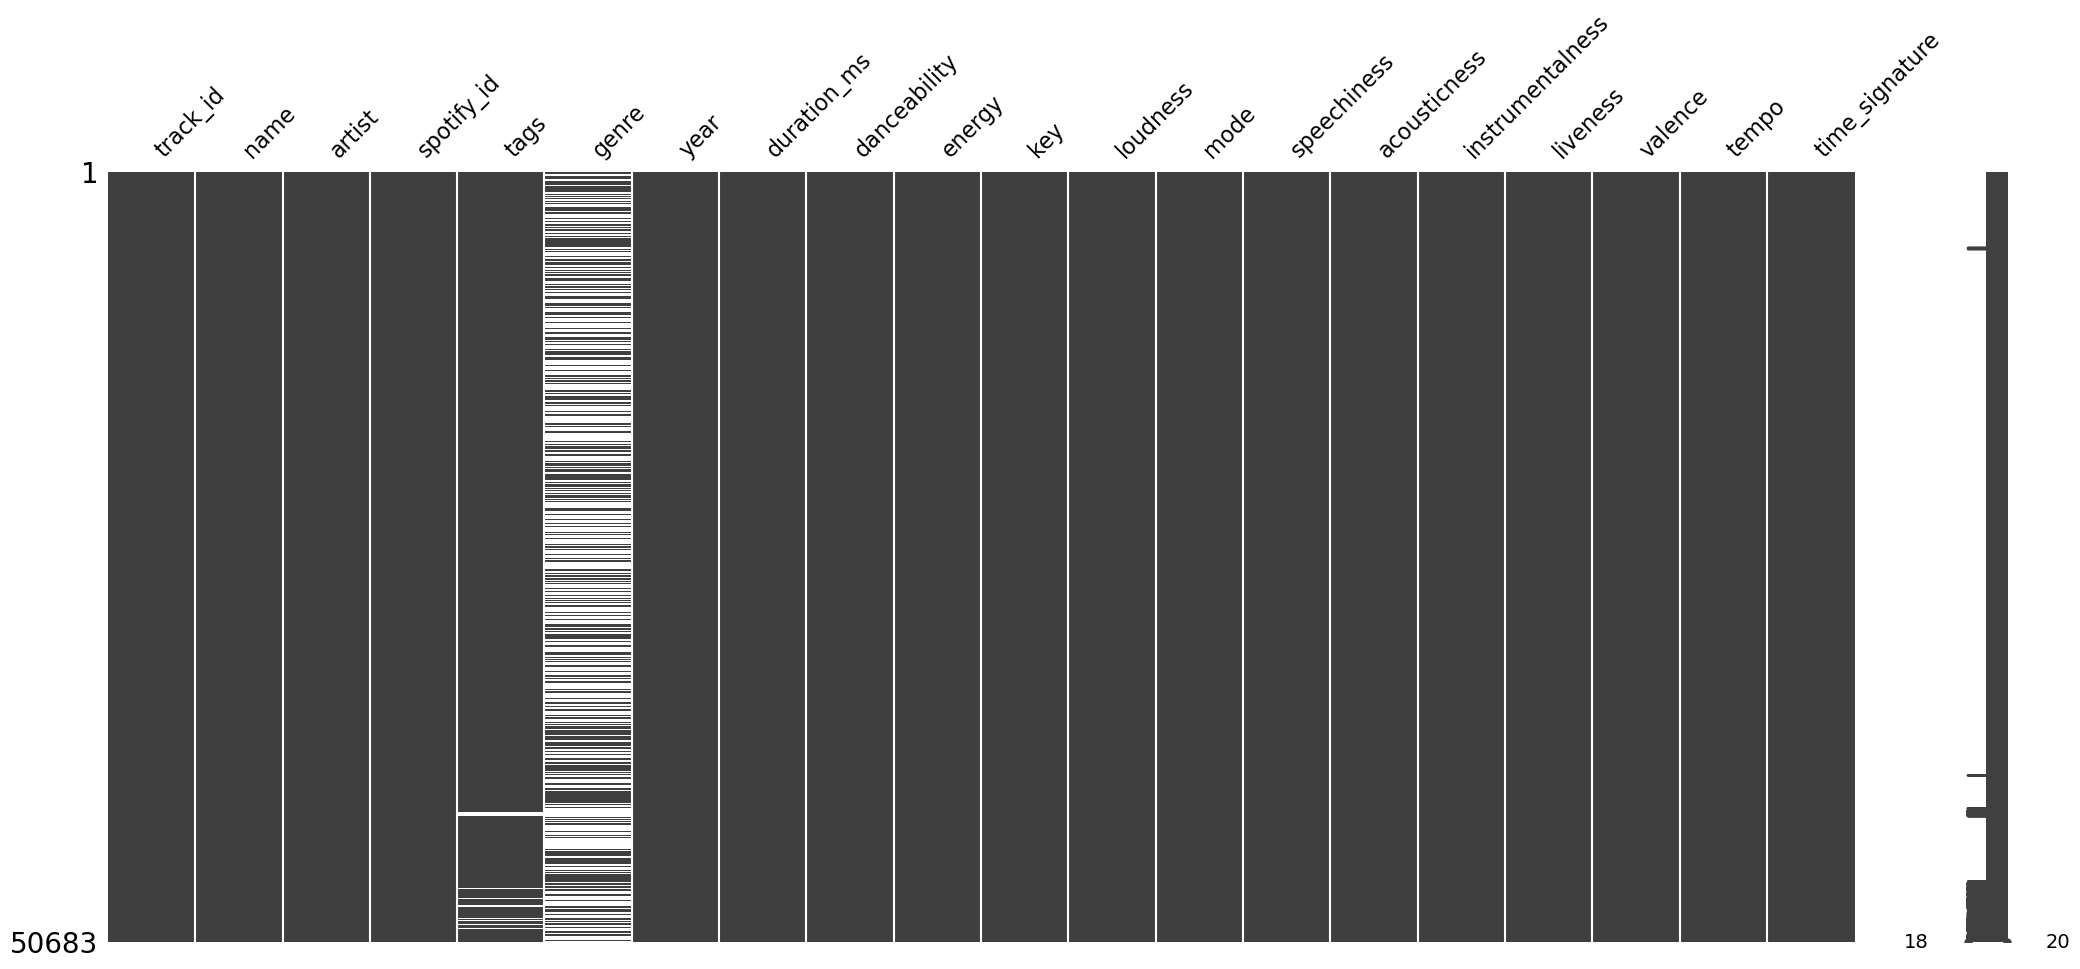

In [14]:
import missingno as msno
msno.matrix(df_songs)

# type of missing is Missing COmpletely at Random for Genre column

In [15]:
# Perce3ntage of missing values
x = df_songs.isna().sum()
y= x[4]/df_songs.shape[0]
z= x[5]/df_songs.shape[0]
print(f'Percentage of tags data missing in dataset is = ', y*100)
print(f'Percentage of genre data missing in dataset is = ', z *100)

Percentage of tags data missing in dataset is =  2.223625278693053
Percentage of genre data missing in dataset is =  55.906319673263226


In [16]:
# DUPLICATES IN DATA
# Cannot afford any duplicate data in the dataset as the recommender system will have two same vectors and will recommend the same song

(
    print(f' The number of duplicate entries are :', df_songs.assign (name = df_songs['name'].str.lower()).duplicated(subset='name').sum())
)



 The number of duplicate entries are : 815


In [17]:
rows_duplicate = df_songs.loc[df_songs. assign(name=df_songs['name'].str.lower())
        .duplicated(subset='name',keep=False)
    ]    .assign(name = df_songs['name'].str.lower()).sort_values('name')

rows_duplicate
# there are duplicate song names but with diferrent artist , hence we cannot classify them as duplicates. 

track_id                            name  \
34480  TRKKZMK128F4257579                            3 am   
6588   TRGGALK12903CB68E5                            3 am   
29795  TRLOXMF128F934BF04                             3am   
43800  TRPWOAS128E0781045                             3am   
15088  TRJRBRX128F4255789                     4th of july   
...                   ...                             ...   
34772  TRJFGYO128F4259743      you're the one that i want   
32677  TRFZYLL128F146902A  you've really got a hold on me   
20976  TRUXHGS128F145E41A  you've really got a hold on me   
27680  TRXWPMW12903CB42A0                         zombies   
37428  TRORIUQ128F42620A3                         zombies   

                                 artist              spotify_id  \
34480                      Liv Kristine  1TgsnkiolcBhQssCR37JXx   
6588                    Matchbox Twenty  5vYA1mW9g2Coh1HUFUSmlb   
29795                   Matchbox Twenty  5vYA1mW9g2Coh1HUFUSmlb   
43800                            Halsey  1OfLNb6dQ9dra1B58iT9Ex   
15088                       Soundgarden  237oH9rNUYpIBeHfAn3WJ0   
...                                 ...                     ...   
34772                           Lo-Fang  1dEHQktvcM8vCCyI1x7yVB   
32677  Smokey Robinson and The Miracles  03AkIZeRvGpTvDF9vNJtdj   
20976                      The Miracles  01FtGX94CSvO5Zxs5B6AMM   
27680                  Childish Gambino  73kAUSAht4YOR7xNPmNb2L   
37428                       Lacuna Coil  02J446tHHPvSSNeLxW8Lg6   

                                                    tags genre  year  \
34480  female_vocalists, power_metal, gothic_metal, g...   NaN  2005   
6588   rock, alternative, pop, alternative_rock, 90s,...   NaN  1996   
29795  rock, alternative, 90s, piano, american, pop_rock   NaN  1996   
43800                                           pop_rock   NaN  2020   
15088                             hard_rock, 90s, grunge   NaN  1994   
...                                                  ...   ...   ...   
34772                       indie, male_vocalists, cover   NaN  2014   
32677                                  soul, 60s, oldies  Rock  2012   
20976                                  soul, 60s, oldies   NaN  1994   
27680                                               funk   NaN  2016   
37428                               gothic_metal, gothic   NaN  2014   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
34480       302880         0.516   0.840    0    -6.038     0       0.0390   
6588        225946         0.521   0.673    8    -8.685     1       0.0284   
29795       225946         0.521   0.673    8    -8.685     1       0.0284   
43800       234858         0.385   0.871    0    -4.604     0       0.0795   
15088       308866         0.368   0.749    5    -5.523     0       0.0392   
...            ...           ...     ...  ...       ...   ...          ...   
34772       204706         0.445   0.309   11   -12.517     0       0.0404   
32677       179513         0.674   0.515    0    -6.895     1       0.0296   
20976       180266         0.679   0.406    0   -10.533     1       0.0312   
27680       281813         0.653   0.411    0   -11.986     1       0.1270   
37428       227440         0.402   0.962    8    -2.988     1       0.0629   

       acousticness  instrumentalness  liveness  valence    tempo  \
34480      0.152000          0.005970     0.107    0.441   78.009   
6588       0.005730          0.000000     0.120    0.543  108.031   
29795      0.005730          0.000000     0.120    0.543  108.031   
43800      0.009060          0.000000     0.579    0.538  189.760   
15088      0.109000          0.000372     0.175    0.193  141.901   
...             ...               ...       ...      ...      ...   
34772      0.643000          0.000369     0.224    0.153  119.754   
32677      0.724000          0.000000     0.339    0.596  116.678   
20976      0.755000          0.000000     0.412    0.511

In [18]:
# Duplicates based on Spotify unique ID, year and duration of song
(
    df_songs.duplicated(subset=["spotify_id", "year", "duration_ms"]).sum()
)

9

In [19]:
df_songs.drop_duplicates(subset=["spotify_id", "year", "duration_ms"], inplace=True)

In [20]:
# CHECK Duplicates based on Spotify unique ID, year and duration of song
(
    df_songs.duplicated(subset=["spotify_id", "year", "duration_ms"]).sum()
)

0

In [21]:
df_songs.shape

(50674, 20)

In [22]:
#Column Analysis

df_songs.columns

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre', 'year',
       'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature'],
      dtype='object')

In [23]:
df_songs.dtypes

track_id             object
name                 object
artist               object
spotify_id           object
tags                 object
genre                object
year                  int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [24]:
# Categorical columns
categorical_features = df_songs.select_dtypes(include = 'object').columns
categorical_features

Index(['track_id', 'name', 'artist', 'spotify_id', 'tags', 'genre'], dtype='object')

In [25]:
def categorical_analysis(df,features, k=15):
    for feature in features:
        print(f' number of unique {feature} in {feature} column is', df[feature].str.lower().nunique())

        if feature in ["artist","genre"]:
            print(df[feature].value_counts().head(k))
        print('#'*50)
    
    
    

In [26]:
categorical_analysis(df_songs,categorical_features)

 number of unique track_id in track_id column is 50674
##################################################
 number of unique name in name column is 49860
##################################################
 number of unique artist in artist column is 8317
The Rolling Stones    132
Radiohead             110
Autechre              105
Tom Waits             100
Bob Dylan              98
The Cure               94
Metallica              85
Johnny Cash            84
Nine Inch Nails        83
Sonic Youth            81
Elliott Smith          76
Iron Maiden            76
In Flames              76
Boards of Canada       75
Mogwai                 75
Name: artist, dtype: int64
##################################################
 number of unique spotify_id in spotify_id column is 50674
##################################################
 number of unique tags in tags column is 20054
##################################################
 number of unique genre in genre column is 15
Rock          9965
Elect

# Above analysis show : 
Each track_id and spotify id is unqiue, 
Top 15 artist ,
some songs have similar names 


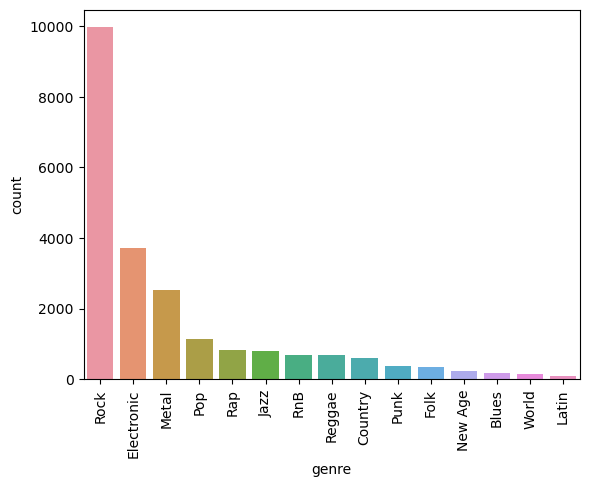

In [27]:
sns.countplot(df_songs, x="genre", order = df_songs['genre'].value_counts().index)
plt.xticks(rotation = 90)
plt.show()

In [28]:
genre_group = df_songs.groupby('genre')
genre_group[['genre','tags']].sample(3)

# Was trying to see if we could fill genre based on tags but it does not seem there is a specific pattern

genre                                               tags
23778       Blues                                  blues, blues_rock
22194       Blues  rock, alternative, rap, hip_hop, funk, rnb, gu...
23929       Blues                                              blues
33659     Country                                            country
29441     Country                           electronic, dance, house
33784     Country       female_vocalists, singer_songwriter, country
40565  Electronic                                  industrial, noise
36952  Electronic                        electronic, electro, french
48185  Electronic                           electronic, experimental
8594         Folk                rock, alternative_rock, 90s, grunge
45586        Folk                    female_vocalists, folk, new_age
12725        Folk  folk, singer_songwriter, chillout, acoustic, b...
1229         Jazz  rock, metal, classic_rock, hard_rock, heavy_me...
8874         Jazz                                               jazz
41837        Jazz                               jazz, oldies, lounge
49265       Latin                                                NaN
30119       Latin                                reggae, 00s, french
29226       Latin                                     trance, techno
18843       Metal                  death_metal, metalcore, grindcore
26221       Metal           post_rock, progressive_metal, doom_metal
7349        Metal  metal, power_metal, gothic_metal, gothic, symp...
45756     New Age                   instrumental, classical, new_age
45340     New Age                                   ambient, new_age
16491     New Age          ambient, experimental, black_metal, noise
29739         Pop                                       dance, house
43777         Pop                                      pop, pop_rock
9252          Pop                       jazz, male_vocalists, oldies
13635        Punk                     punk, 80s, hardcore, punk_rock
23446        Punk                                    punk, punk_rock
31850        Punk                         punk, punk_rock, post_punk
44723         Rap                               hip_hop, avant_garde
20538         Rap                             hardcore, rap, hip_hop
50507         Rap                                          metalcore
30335      Reggae                                             reggae
47811      Reggae                         industrial, german, gothic
30242      Reggae                                        reggae, ska
23928         RnB                                   soul, blues, 60s
32865         RnB                                                rnb
20935         RnB                                         soul, funk
21274        Rock  indie, female_vocalists, indie_rock, chillout,...
9011         Rock    rock, jazz, classic_rock, progressive_rock, 70s
24981        Rock                           acoustic, male_vocalists
49407       World                                            ambient
49413       World                                                NaN
49121       World                                         soundtrack

In [29]:
# alll tags - unique values
tag_list = df_songs.loc[:,"tags"].dropna().str.split(',').explode().str.strip().unique()
tag_list

array(['rock', 'alternative', 'indie', 'alternative_rock', 'indie_rock',
       '00s', 'pop', 'british', '90s', 'love', 'britpop', 'grunge',
       'piano', 'beautiful', 'mellow', 'chillout', 'funk', 'electronic',
       'dance', 'hip_hop', 'trip_hop', 'metal', 'hard_rock', 'nu_metal',
       'progressive_rock', 'classic_rock', '80s', '70s', 'experimental',
       'soundtrack', 'female_vocalists', 'heavy_metal', 'rap', '60s',
       'post_punk', 'pop_rock', 'punk', 'punk_rock', 'acoustic', 'emo',
       'new_wave', 'chill', 'indie_pop', 'gothic_metal', 'gothic',
       'thrash_metal', 'folk', 'singer_songwriter', 'country', 'cover',
       'blues_rock', 'psychedelic', 'psychedelic_rock', 'guitar',
       'american', 'ska', 'ambient', 'blues', 'oldies', 'french',
       'male_vocalists', 'reggae', 'instrumental', 'jazz', 'avant_garde',
       'industrial', 'german', 'synthpop', 'hardcore', 'metalcore',
       'screamo', 'post_rock', 'swedish', 'doom_metal', 'power_metal',
       'rnb', 

In [30]:
integer_columns = df_songs.select_dtypes('int').columns
integer_columns

Index(['year', 'duration_ms', 'key', 'mode', 'time_signature'], dtype='object')

Key

What it means: The musical key in which the song is composed, represented as integers (e.g., 0 = C, 1 = C#, 2 = D, etc., up to 11).

When value is small: Represents keys like C or D, often associated with simplicity or familiarity.
When value is large: Represents keys like A# or B, which may sound brighter or more complex, depending on the context.

Mode

What it means: Refers to the modality of the song, where 0 = minor (often associated with sadness or tension) and 1 = major (associated with happiness or resolution).

When value is small: Indicates the song is in a minor mode, creating a more somber or serious tone.
When value is large: Indicates the song is in a major mode, giving it a cheerful and uplifting feel.

Time Signature

What it means: The number of beats in each bar of music, typically expressed as an integer (e.g., 4 for 4/4 time).

When value is small: Indicates fewer beats per measure (e.g., 3), which can create a waltz-like or less conventional rhythm.
When value is large: Indicates more beats per measure (e.g., 5 or 7), often leading to a more complex or experimental rhythmic structure.
A value of 4 in the time signature typically means the song is in 4/4 time, also known as "common time." This means there are 4 beats per measure, and the quarter note gets one beat.

Impact of a 4 Time Signature:

Musical Feel: It creates a steady, balanced, and natural rhythm that is easy to follow.
Prevalence: It is the most common time signature in Western music, used in many genres like pop, rock, classical, and jazz.
Examples: Songs like "Billie Jean" by Michael Jackson or "Shape of You" by Ed Sheeran are in 4/4.

In [31]:
df_songs[integer_columns]

year  duration_ms  key  mode  time_signature
0      2004       222200    1     1               4
1      2006       258613    2     1               4
2      1991       218920    4     0               4
3      2004       237026    9     1               4
4      2008       238640    7     1               4
...     ...          ...  ...   ...             ...
50678  2008       273440    6     0               4
50679  2004       275133    0     1               4
50680  2014       254826   10     0               4
50681  2008       243293    4     0               4
50682  2008       131960    8     1               4

[50674 rows x 5 columns]

In [32]:
df_songs[integer_columns].drop(columns=["duration_ms"]).nunique()

year              75
key               12
mode               2
time_signature     5
dtype: int64

In [33]:
df_songs[integer_columns].describe()

year   duration_ms           key          mode  time_signature
count  50674.000000  5.067400e+04  50674.000000  50674.000000    50674.000000
mean    2004.017109  2.511536e+05      5.312507      0.631073        3.898153
std        8.860497  1.075892e+05      3.567967      0.482519        0.419686
min     1900.000000  1.439000e+03      0.000000      0.000000        0.000000
25%     2001.000000  1.927330e+05      2.000000      0.000000        4.000000
50%     2006.000000  2.349330e+05      5.000000      1.000000        4.000000
75%     2009.000000  2.881828e+05      9.000000      1.000000        4.000000
max     2022.000000  3.816373e+06     11.000000      1.000000        5.000000

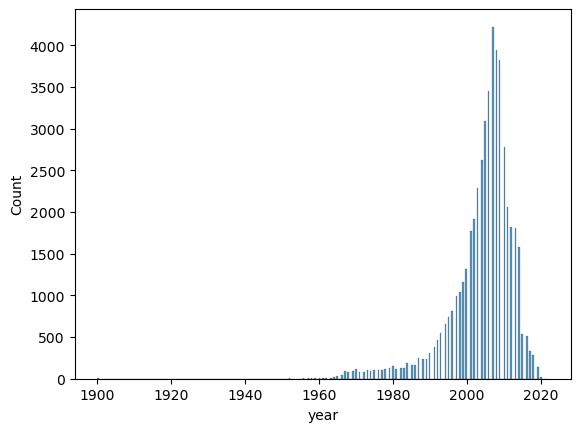

In [34]:
sns.histplot(df_songs, x = 'year')
plt.show()

In [35]:
# Most song in which year in dataset
(
    df_songs['year'].value_counts().head(5)
)

2007    4221
2008    3947
2009    3827
2006    3453
2005    3085
Name: year, dtype: int64

Keys

Musical notes are assigned key values from 0 to 11, representing all the chromatic notes in an octave. Here’s the mapping:

Key Value --> Note

0-->	         C

1-->	         C# / Db

2	-->         D

3	-->        D# / Eb

4-->	E

5-->	F

6-->	F# / Gb

7-->	G

8-->	G# / Ab

9-->	A

10-->	A# / Bb

11-->	B

keyboard_arrow_down
Notes Explained:
Sharps (#): Raise the note by a semitone (e.g., C → C#).
Flats (b): Lower the note by a semitone (e.g., D → Db).
This cycle repeats across octaves!

In [36]:
# unique values in the key column

(
    np.sort(df_songs['key'].unique())
)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [37]:
percentages = df_songs['key'].value_counts(normalize=True) * 100
percentages

9     11.656865
7     11.585823
2     11.546355
0     11.333228
1      8.919762
4      8.558630
11     8.085014
5      7.206852
6      6.383944
10     5.965584
8      5.957690
3      2.800253
Name: key, dtype: float64

<Axes: title={'center': 'Percentage of songs wrt Key'}, ylabel='key'>

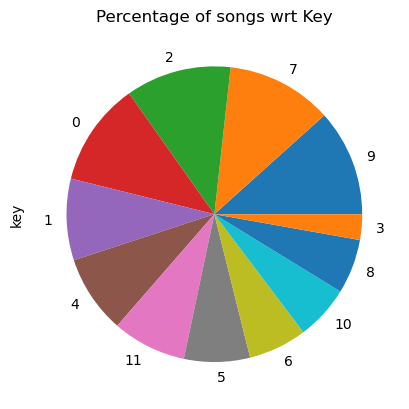

In [38]:
percentages.plot(kind='pie', title = "Percentage of songs wrt Key", xlabel='Percentage')
# Songs are comprised of Major keys

# Continous Columns

In [39]:
continous_columns = df_songs.select_dtypes('float').columns
continous_columns


Index(['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo'],
      dtype='object')

**Danceability**
  
**What it means:** Measures how suitable a track is for dancing, based on tempo, rhythm stability, beat strength, and overall regularity.  
- **When value is small:** The song may feel less rhythmic or harder to dance to, like ballads or experimental music.  
- **When value is large:** The song is highly danceable, with a strong beat and rhythmic consistency, ideal for clubs or parties.  

---

**Energy**

**What it means:** Represents the intensity and activity of a song, considering factors like loudness, tempo, and instrumentation.  
- **When value is small:** The song feels mellow, calm, or laid-back, such as acoustic or chill tracks.  
- **When value is large:** The song feels loud, energetic, and lively, often found in rock or EDM genres.  

---

**Loudness**

**What it means:** The overall volume of the song in decibels (dB), averaged over the track.  
- **When value is small:** The song is quieter, suitable for soft or ambient styles.  
- **When value is large:** The song is louder and more powerful, typically associated with dynamic or energetic tracks.  

---

**Speechiness**

**What it means:** Measures the presence of spoken words in a track. A higher value indicates more speech-like content.  
- **When value is small:** The song is more musical, with fewer spoken or rap-like elements.  
- **When value is large:** The track has spoken word, podcast-style content, or heavy rap influence.  

---

**Acousticness**

**What it means:** Reflects how acoustic (non-electronic) the track is.  
- **When value is small:** The track is more electronic or synthetic in nature.  
- **When value is large:** The track is acoustic, featuring instruments like guitar, piano, or strings.  

---

**Instrumentalness**

**What it means:** Predicts the likelihood of a song having no vocals (purely instrumental).  
- **When value is small:** The track likely has vocals or lyrics.  
- **When value is large:** The track is primarily instrumental, like classical or ambient music.  

---

**Liveness**

**What it means:** Measures the presence of a live audience in the recording.  
- **When value is small:** The track sounds studio-produced without live ambiance.  
- **When value is large:** The track feels live, with audience sounds or a concert vibe.  

---

**Valence**

**What it means:** Indicates the positivity or happiness of a track's mood.  
- **When value is small:** The song feels sad, somber, or emotionally heavy.  
- **When value is large:** The song feels cheerful, uplifting, or happy.  

---

**Tempo**
  
**What it means:** The speed of the song in beats per minute (BPM).  
- **When value is small:** The song is slow-paced, such as ballads or downtempo tracks.  
- **When value is large:** The song is fast-paced, like dance or upbeat genres.  

In [40]:
def numerical_analysis(df,columns):
    for column in columns:
        print(f'Statistical analaysis of {column.upper()}')
        print(df[column].describe())

        fig = plt.figure(figsize=(12,4))
        # hitogram for column
        plt.subplot(1,2,1)
        sns.histplot(df[column])
        plt.title(f"Histogram for {column}")
        # boxplot for column
        plt.subplot(1,2,2)
        sns.boxplot(df[column])
        plt.title(f"Boxplot for {column}")
        plt.show()

        print("#" * 120)
        print("*" * 120)
    print("Pairplot")
    sns.pairplot(df[columns])
    plt.show()

Statistical analaysis of DANCEABILITY
count    50674.000000
mean         0.493522
std          0.178833
min          0.000000
25%          0.364000
50%          0.497000
75%          0.621000
max          0.986000
Name: danceability, dtype: float64


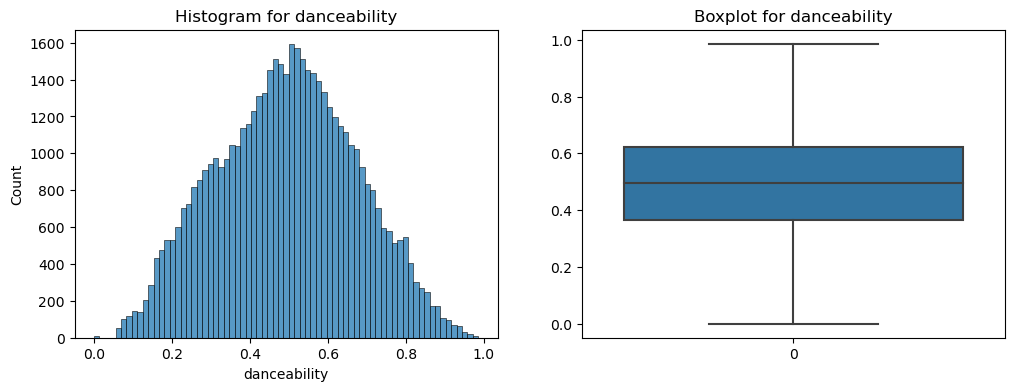

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of ENERGY
count    50674.000000
mean         0.686507
std          0.251803
min          0.000000
25%          0.514000
50%          0.744000
75%          0.905000
max          1.000000
Name: energy, dtype: float64


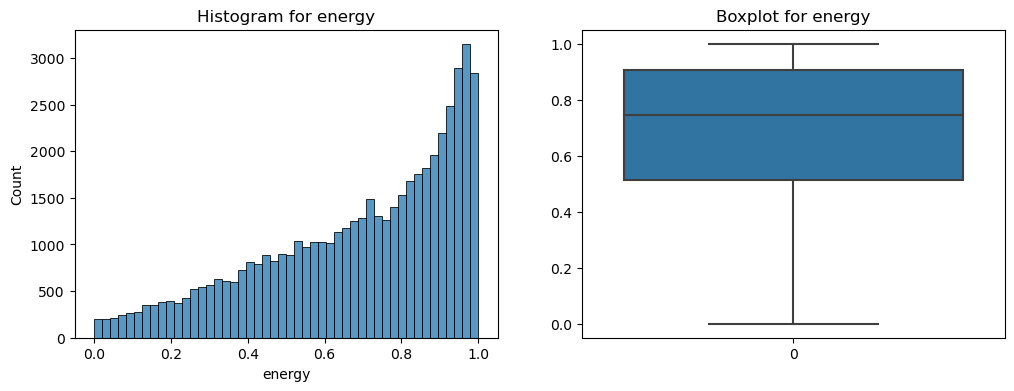

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of LOUDNESS
count    50674.000000
mean        -8.291007
std          4.548359
min        -60.000000
25%        -10.375000
50%         -7.199500
75%         -5.089000
max          3.642000
Name: loudness, dtype: float64


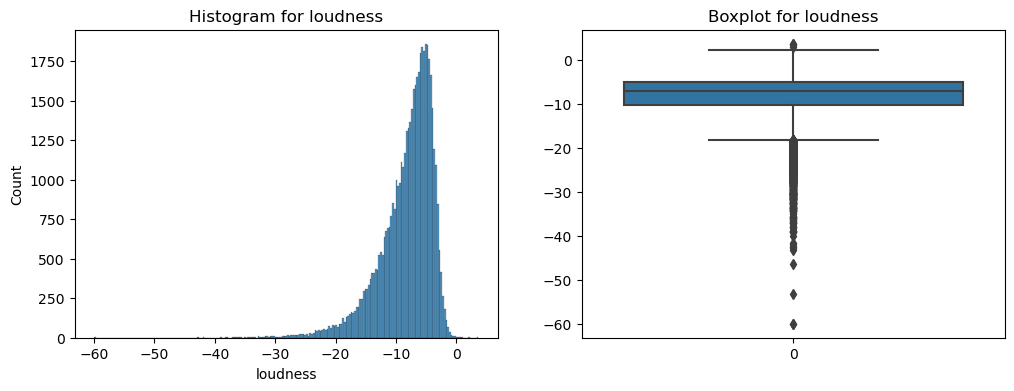

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of SPEECHINESS
count    50674.000000
mean         0.076026
std          0.076012
min          0.000000
25%          0.035200
50%          0.048200
75%          0.083500
max          0.954000
Name: speechiness, dtype: float64


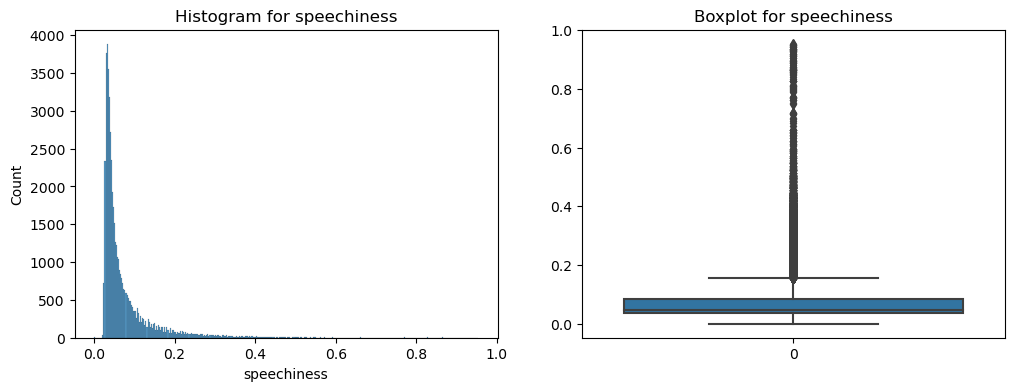

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of ACOUSTICNESS
count    50674.000000
mean         0.213798
std          0.302839
min          0.000000
25%          0.001400
50%          0.039900
75%          0.340000
max          0.996000
Name: acousticness, dtype: float64


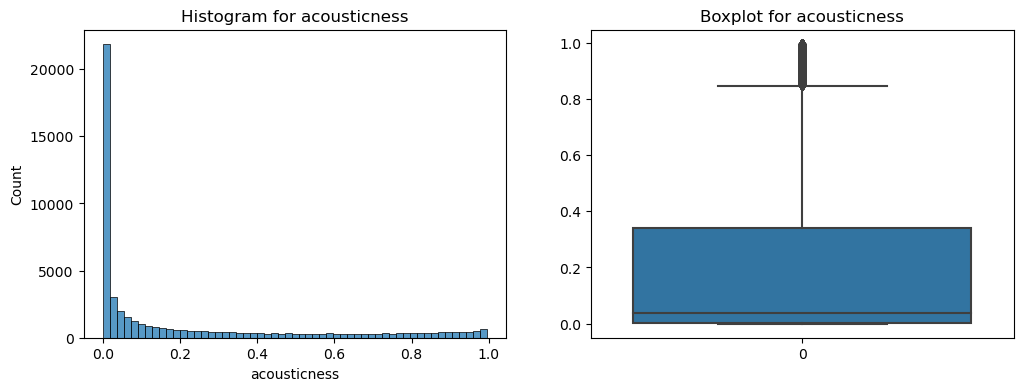

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of INSTRUMENTALNESS
count    50674.000000
mean         0.225299
std          0.337067
min          0.000000
25%          0.000018
50%          0.005630
75%          0.441000
max          0.999000
Name: instrumentalness, dtype: float64


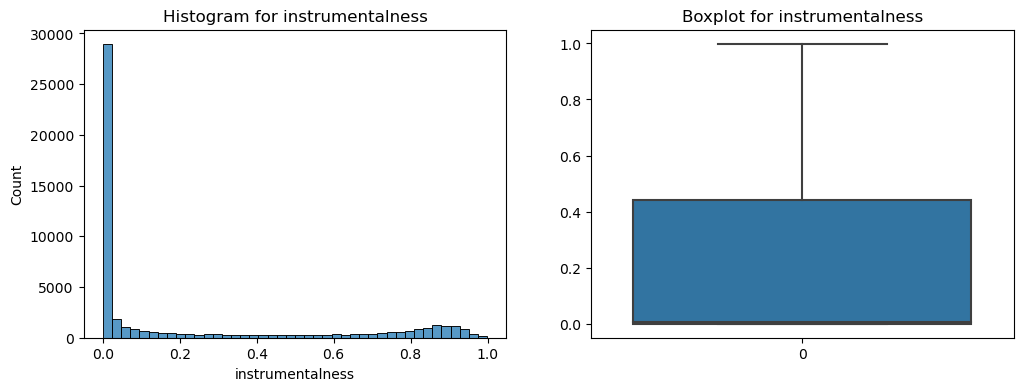

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of LIVENESS
count    50674.000000
mean         0.215439
std          0.184708
min          0.000000
25%          0.098400
50%          0.138000
75%          0.289000
max          0.999000
Name: liveness, dtype: float64


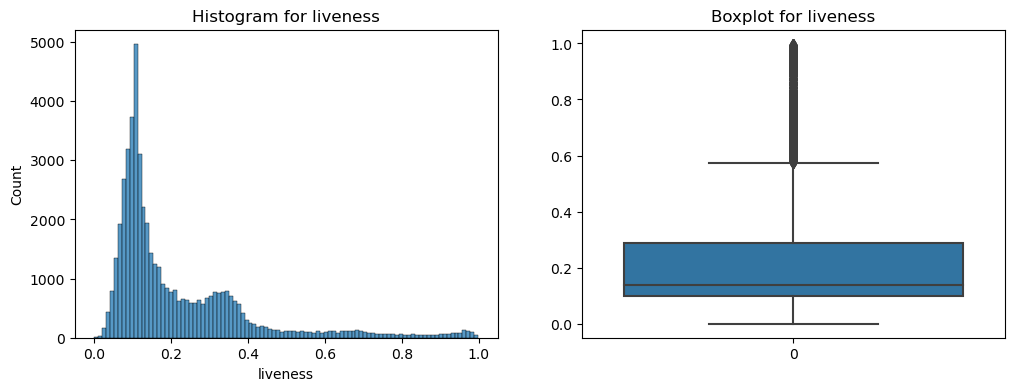

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of VALENCE
count    50674.000000
mean         0.433113
std          0.258767
min          0.000000
25%          0.214000
50%          0.405000
75%          0.634000
max          0.993000
Name: valence, dtype: float64


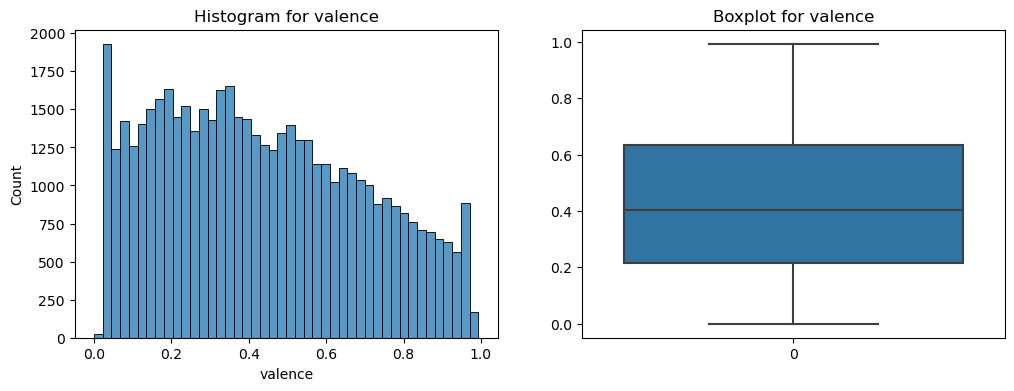

########################################################################################################################
************************************************************************************************************************
Statistical analaysis of TEMPO
count    50674.000000
mean       123.508794
std         29.622349
min          0.000000
25%        100.682500
50%        121.989000
75%        141.642250
max        238.895000
Name: tempo, dtype: float64


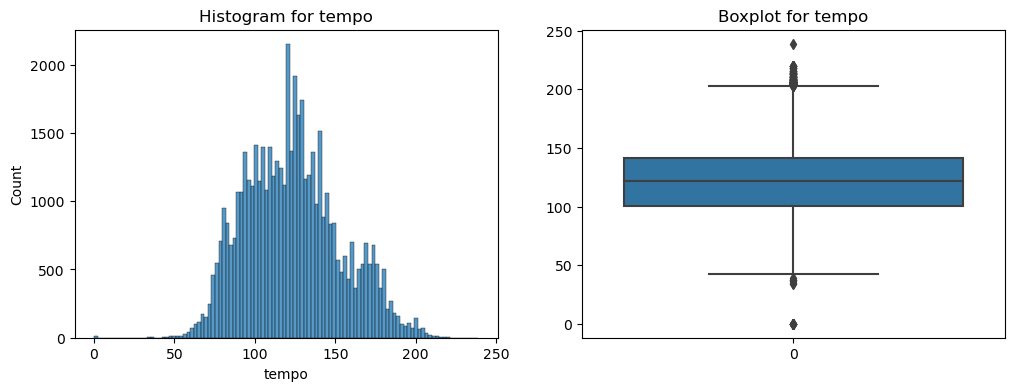

########################################################################################################################
************************************************************************************************************************
Pairplot


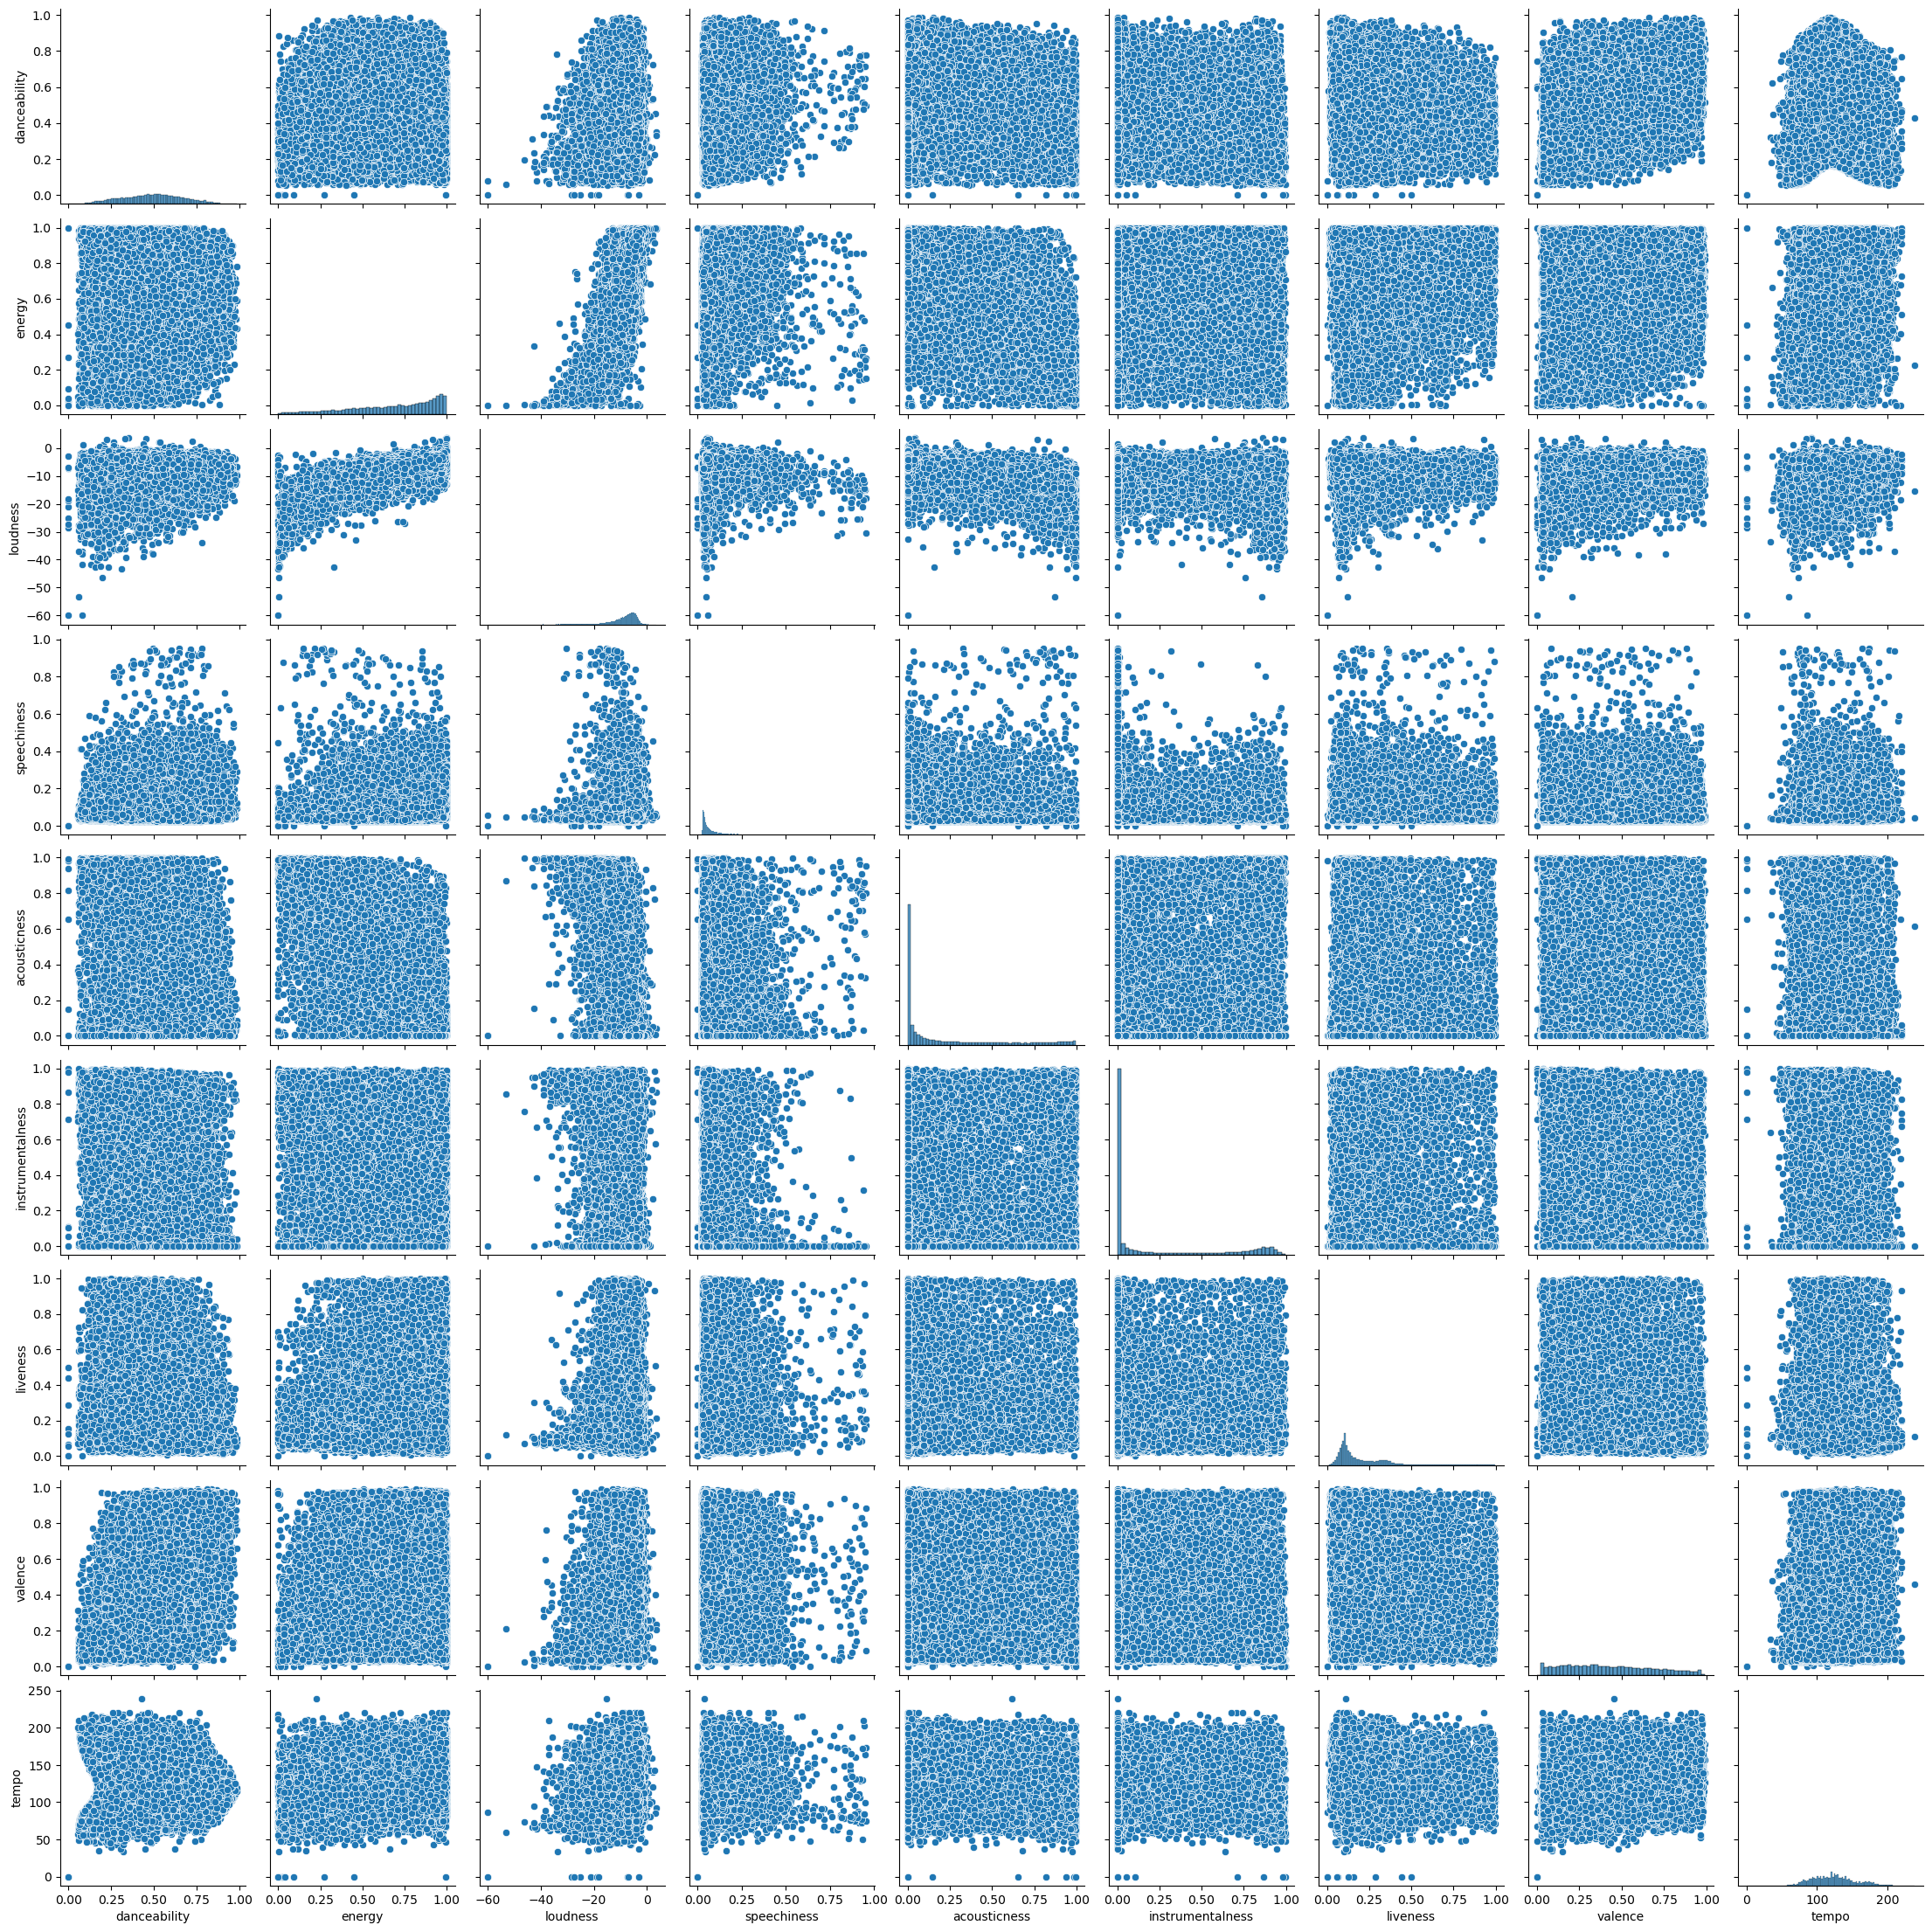

In [41]:
numerical_analysis(df_songs,continous_columns)

### The above pairplot shows relationship between loudness and energy 

# USERS AND SONGS DATA - 2ND CSV FILE

In [42]:
df_users = pd.read_csv(user_data_path)
df_users.head(3)

track_id                                   user_id  playcount
0  TRIRLYL128F42539D1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
1  TRFUPBA128F934F7E1  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1
2  TRLQPQJ128F42AA94F  b80344d063b5ccb3212f76538f3d9e43d87dca9e          1

In [43]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9711301 entries, 0 to 9711300
Data columns (total 3 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   track_id   object
 1   user_id    object
 2   playcount  int64 
dtypes: int64(1), object(2)
memory usage: 222.3+ MB


In [44]:
df_users.duplicated(subset=['track_id', 'user_id']).sum()


0

In [45]:
df_users.isna().sum()

track_id     0
user_id      0
playcount    0
dtype: int64

In [46]:
(
    df_users['user_id'].nunique()
)

962037

In [47]:
(
    df_users['track_id'].nunique()
)

30459

## Song database has 50,000 songs but in the user data , only 30,000 songs data is present. This means out of 50,000 songs, the users in this database has only played 30,000 from them. 

In [48]:
top_10songs = (df_users.loc[: , 'track_id'].value_counts().head(10))
print(top_10songs)

TRONYHY128F92C9D11    80656
TRUFTBY128F93450B8    39529
TRXWAZC128F9314B3E    30873
TRCPXID128F92D5D3C    30057
TRGCHLH12903CB7352    29708
TROMKCG128F9320C09    28735
TRPFYYL128F92F7144    28412
TRPGPDK12903CCC651    27276
TRWAQOC12903CB84CA    27222
TRAALAH128E078234A    26689
Name: track_id, dtype: int64


In [49]:
df_songs.loc[df_songs['track_id'].isin(top_10songs.index.tolist()), :]
# Below are the top 10 songs in Song database which has been played by most users

track_id                   name             artist  \
44     TRAALAH128E078234A  Bitter Sweet Symphony          The Verve   
59     TRPFYYL128F92F7144               Float On       Modest Mouse   
323    TRONYHY128F92C9D11                Revelry      Kings of Leon   
1876   TRXWAZC128F9314B3E     Heartbreak Warfare         John Mayer   
2107   TRUFTBY128F93450B8              Alejandro          Lady Gaga   
2742   TRCPXID128F92D5D3C                   Halo       Depeche Mode   
3168   TRWAQOC12903CB84CA             Sexy Bitch       David Guetta   
19724  TROMKCG128F9320C09               Uprising            Sabaton   
22071  TRPGPDK12903CCC651       Bring Me To Life  Katherine Jenkins   
23220  TRGCHLH12903CB7352    Party In The U.S.A.  The Barden Bellas   

                   spotify_id  \
44     0jLnevC3Vn34qVWrAa4X6x   
59     1Urf1M52P3R6NYdAOJizoW   
323    039Q3UlFQ6kavVIZHpO4mL   
1876   0naTARZScsZOtx3nlhlq0Y   
2107   0CXHrBetrvDx4PwBar1ZWj   
2742   0Ti7ZxvgWq74Ls56vYP3Ov   
3168   01N6xy2PX9fKVfrA2YOkYd   
19724  09tHVoXbJNZUotndn8pfJr   
22071  0rJ8HF2zsxsWMzirj3YFQR   
23220  0bz2Uy1KE7bNGsGQU9pZrU   

                                                    tags genre  year  \
44     rock, alternative, indie, pop, alternative_roc...   NaN  1999   
59     rock, alternative, indie, alternative_rock, in...  Rock  2004   
323    rock, alternative, indie, alternative_rock, in...  Rock  2008   
1876   rock, alternative, indie, pop, singer_songwrit...  Rock  2010   
2107            electronic, pop, female_vocalists, dance   Pop  2010   
2742   electronic, pop, 80s, british, 90s, new_wave, ...   NaN  1990   
3168                            electronic, dance, house   NaN  2009   
19724                    metal, heavy_metal, power_metal   NaN  2010   
22071                          classical, cover, new_age  Rock  2012   
23220                                  soundtrack, cover   Pop  2012   

       duration_ms  danceability  energy  key  loudness  mode  speechiness  \
44          358333         0.383   0.907    9    -5.409     1       0.0405   
59          208466         0.646   0.893    6    -4.799     1       0.0301   
323         201733         0.437   0.748    4    -6.593     1       0.0689   
1876        263280         0.626   0.572    2    -7.989     1       0.0228   
2107        274800         0.626   0.800   11    -6.777     0       0.0435   
2742        270160         0.672   0.508    3   -12.620     0       0.0310   
3168        193800         0.810   0.595   11    -5.812     0       0.0579   
19724       295640         0.527   0.866    6    -3.763     0       0.0346   
22071       226093         0.429   0.563    4    -8.006     0       0.0300   
23220        63080         0.531   0.360   10    -8.575     0       0.1080   

       acousticness  instrumentalness  liveness  valence    tempo  \
44         0.031300          0.000000    0.3470    0.514  171.052   
59         0.015100          0.000004    0.0892    0.559  100.951   
323        0.196000          0.000328    0.1580    0.383  149.834   
1876       0.197000          0.000497    0.2720    0.297   97.081   
2107       0.000582          0.001140    0.3740    0.353   98.995   
2742       0.052800          0.067100    0.0801    0.741  112.184   
3168       0.067300          0.000764    0.1190    0.813  130.018   
19724      0.009910          0.000052    0.1290    0.428   87.986   
22071      0.881000          0.000097    0.0760    0.298   95.989   
23220      0.822000          0.000000    0.1780    0.701   97.200   

       time_signature  
44                  4  
59                  4  
323                 4  
1876                4  
2107                4  
2742                4  
3168                4  
19724               4  
22071               4  
23220               4

In [ ]:
class Car:
    def __init__(self, brand, model,year = '1997'):
        self.brand = brand
        self.model = model
        self.year = year
    
    def spped(self, dist, time):
        self.dist = dist
        self.time = time

        speeed = self.dist*self.time

        return speeed
    
    def spped2(dist,time):  #theobject my_car does not inherit this function
         return dist + time


my_car = Car("Toyota", "Corolla")
print(my_car.brand)  # Output: Toyota
print(my_car.year)

x = my_car.spped(10,5)
print(x)

y= my_car.spped2(10)
print(y)



Toyota
1997
50


TypeError: unsupported operand type(s) for +: 'Car' and 'int'

In [80]:
def spped2(dist,time):
    return dist + time

x = spped2(10,3)
print(x)


13


In [92]:
class Car:
    def __init__(self, brand: str, model,year:int):
        self.b = brand.lower()
        self.c = model
        self.y = year

    def car_brand(self, brand):
        
        brandy = brand
        return brandy
    
    def give_recommendations(self):
        x = self.car_brand(brand = self.b)
        return x
    
mycar= Car('TOYOTA', 'RAV', 10)
x = mycar.car_brand("TOYOTA")
print(x)

y = mycar.give_recommendations()
print(y)

TOYOTA
toyota


In [93]:
track_ids = np.load("D:/spotify_recommender/data/track_ids.npy", allow_pickle=True)

In [96]:
track_ids[[1,2,3]]

array(['TRAAAHD128F42635A5', 'TRAAAQO12903CD8E1C', 'TRAABJS128F9325C99'],
      dtype=object)

In [97]:
import pandas as pd
import dask.dataframe as dd
from scipy.sparse import csr_matrix, save_npz
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

# set paths
#input path
song_data_path = 'D:/spotify_recommender/data/cleaned_data.csv'
user_listening_data_path = 'D:/spotify_recommender/data/User Listening History.csv'

#output path
track_ids_save_path = "D:/spotify_recommender/data/track_ids.npy"
filtered_data_save_path = "D:/spotify_recommender/data/collab_filtered_data.csv"
interaction_matrix_save_path = "D:/spotify_recommender/data/interaction_matrix.npz"

#function to filter the entire song data  to only those songs that the user history playcount has
def filter_songs_data(songs_data :pd.DataFrame, track_ids = list) -> pd.DataFrame:

    filtered_data = songs_data[songs_data['track_id'].isin(track_ids)]
    filtered_data.sort_values(by = 'track_id', inplace=True)
    filtered_data.reset_index(drop=True, inplace=True)
    filtered_data.to_csv(filtered_data_save_path)

# def main():
#     #loading the user listening dataset
#     df_user_listening = dd.read_csv(user_listening_data_path)

#     #getting the unique tracks id to reduce our cleaned dataset to only those tracks
#     unique_track_ids = df_user_listening['track_id'].unique().compute()  #compute since its a dask df
#     unique_track_ids = unique_track_ids.tolist()

#     df_songs = pd.read_csv(song_data_path)
#     filter_songs_data(df_songs, unique_track_ids)

  

# if __name__ == "__main__":
#     main()




In [101]:
df_user_listening_data = dd.read_csv(user_listening_data_path)
df_user_listening_data

unique_track_ids = df_user_listening_data['track_id'].unique().compute()
unique_track_ids= unique_track_ids.tolist()
len(unique_track_ids)

30459

In [ ]:
df = pd.read_csv('D:/spotify_recommender/data/Music Info.csv')
print(df.shape)

filtered_df = df[df['track_id'].isin(unique_track_ids)]
print(filtered_df.shape)

(50683, 21)


(30459, 21)